<a href="https://colab.research.google.com/github/Artemis601/ML/blob/master/House_Prices_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we aim to 
4. Compare several models on a performance metric 
5. Evaluate the best model on the testing set
6. Submit results on Kaggle. 

In [0]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# set display options
pd.set_option('display.max_columns', None)



# Load data

Let's read both train and test datasets and remove 

In [92]:
path_x_train= '/Users/kavyaannapareddy/Desktop/Projects/python/wip/x_train.csv'
path_x_test= '/Users/kavyaannapareddy/Desktop/Projects/python/wip/x_test.csv'
path_y_train= '/Users/kavyaannapareddy/Desktop/Projects/python/wip/y_train.csv'
X_train_df = pd.read_csv(path_x_train)
X_test_df= pd.read_csv(path_x_test, index_col='Id')
y_train_df= pd.read_csv(path_y_train)
X_train_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtHalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_ALQ,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,

# Error Metric 
Root Mean Square Error

In [0]:
def rmse(y_pred, y_test):
    return np.sqrt(((y_pred - y_test) ** 2).mean())

# Models to Evaluate

We try to find a model that works best for our data and then validate it for X_test. In order to do so, we split our X_train data into train and test datasets using cross validation technique.

We will use the following models using Sklearn library
1. Linear Regression
2. Support Vector Machine Regression
3. Random Forest Regression
4. Gradient Boosting Regression
5. K-nearest Neighbors Regression

I recommend [this](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) post for understanding cross validation better.

In [0]:
# Specify features and output
X= X_train_df
y= y_train_df

In [21]:
X.shape

(1456, 288)

In [22]:
y.shape

(1456, 1)

In [0]:
kf= KFold(n_splits= 2, random_state=42, shuffle=True) # for random index selection and keeping them same throughout

from sklearn.model_selection import KFold
from sklearn import metrics
def r2_score(model,dfX,dfy,n):
  """ 
  Inputs: model to be applied, df for splitting into test and train
  We use K-fold validation with n number of splits
  Output: mean of r2 score calculated for all the folds
  """
  kf= KFold(n_splits= n, random_state=42, shuffle=True)

  scores=[]
  for train_index , test_index in kf.split(X):
    x_train, x_test = dfX.iloc[train_index], dfX.iloc[test_index]
    y_train , y_test = dfy.iloc[train_index], dfy.iloc[test_index]
    model.fit(x_train, y_train)
    y_pred= model.predict(x_test)
    error= metrics.r2_score(y_test,y_pred )
    scores.append(error)

  return np.mean(scores)





## Linear Regression

In [204]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
r2_score(lr, X,y, 10)


0.8750416652182276

## Lasso

In [167]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
lasso= Lasso()
params= {'alpha':[1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]}
lasso_reg = GridSearchCV(lasso, params, cv= 10)
lasso_reg.fit(X,y)
lasso_reg.best_params_


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8828458056234142, tolerance: 0.0032110133069656963
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9182046787918898, tolerance: 0.0031892785709414376
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9011894453403481, tolerance: 0.003130940520754183
  positive)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

{'alpha': 0.0001}

In [157]:
lasso_reg

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [206]:
ls= Lasso(alpha=0.0001)
r2_score(ls, X,y, 10)

0.9113345240021129

## Elastic Net Regression
We set the same alpha value as Lasso and set l1 ratio close to 1. If set to 1, it is same as Lasso. 

In [213]:

from sklearn.linear_model import ElasticNet
eln= ElasticNet(alpha=0.0001, l1_ratio=0.9 )
r2_score(eln, X,y,10)

0.9112956194650655

Of all the above models, Lasso fared the best and it makes sense as our dataset has lots of variables and they the model makes some of them zero before running the linear regression. 

I use the same lambda that I used earlier to inverse now.

## Inverse boxcox
I used boxcox transformation to make my y_train data more normal and I need to reverse the transformation before I make my result final. 
[stackoverflow](https://stackoverflow.com/questions/26391454/reverse-box-cox-transformation)


In [0]:
#Function
def invboxcox(df,lamd):
   if lamd == 0:
      return(np.exp(df))
   else:
      return(np.exp(np.log(lamd*df+1)/lamd))



In [217]:
ls.fit(X_train_df,y_train_df)
y_pred = ls.predict(X_test_df)
y_pred

array([7.68988106, 7.7684294 , 7.83842794, ..., 7.8074183 , 7.65984986,
       7.88372381])

In [227]:
y_lamd= -0.0782284443543878
y_test= invboxcox(y_pred,y_lamd)
y_test

array([128438.08505869, 156667.59444811, 187507.73778607, ...,
       173105.84185339, 119139.48389971, 210916.06002953])

In [226]:
y_test_df= pd.DataFrame(data= y_test, index=X_test_df.index, columns=['SalePrice'])
y_test_df

,SalePrice
Id,
1461,128438.085059
1462,156667.594448
1463,187507.737786
1464,200542.447837
1465,205505.850775
...,...
2915,81769.568405
2916,77907.044785
2917,173105.841853


We save this into a csv file for submission

In [0]:
y_test_df.to_csv('y_test_1.csv')

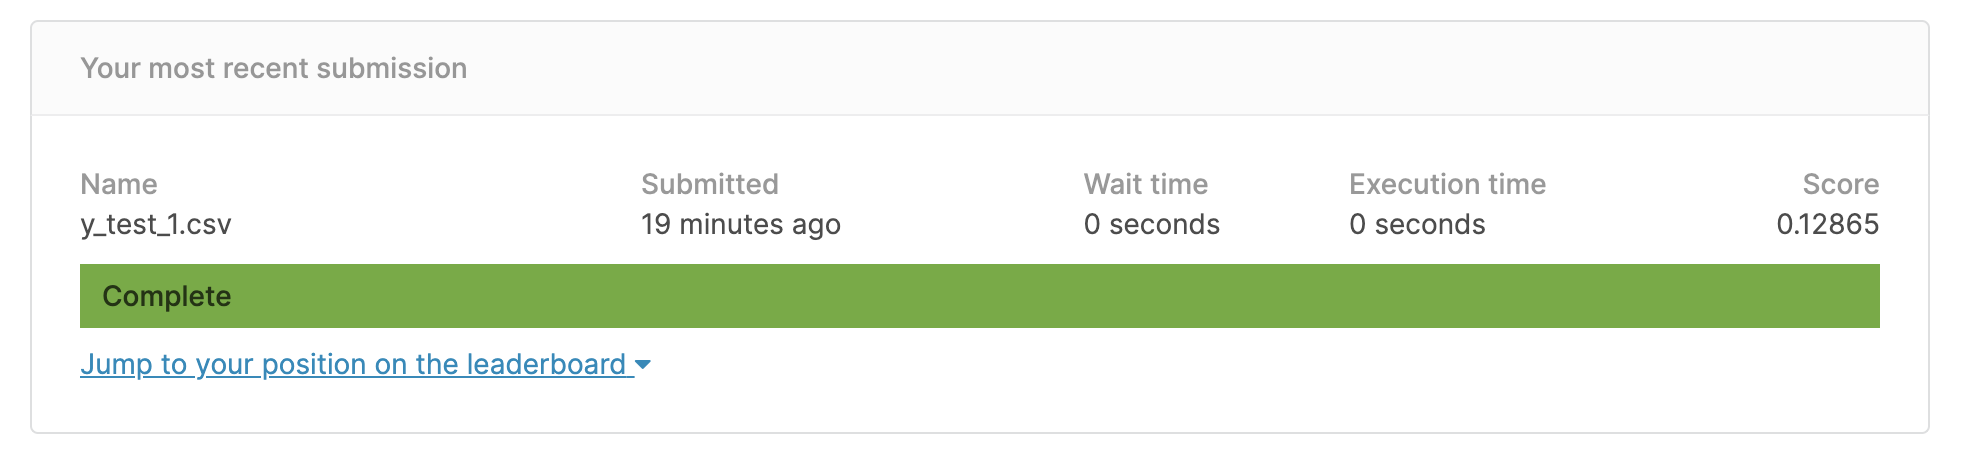

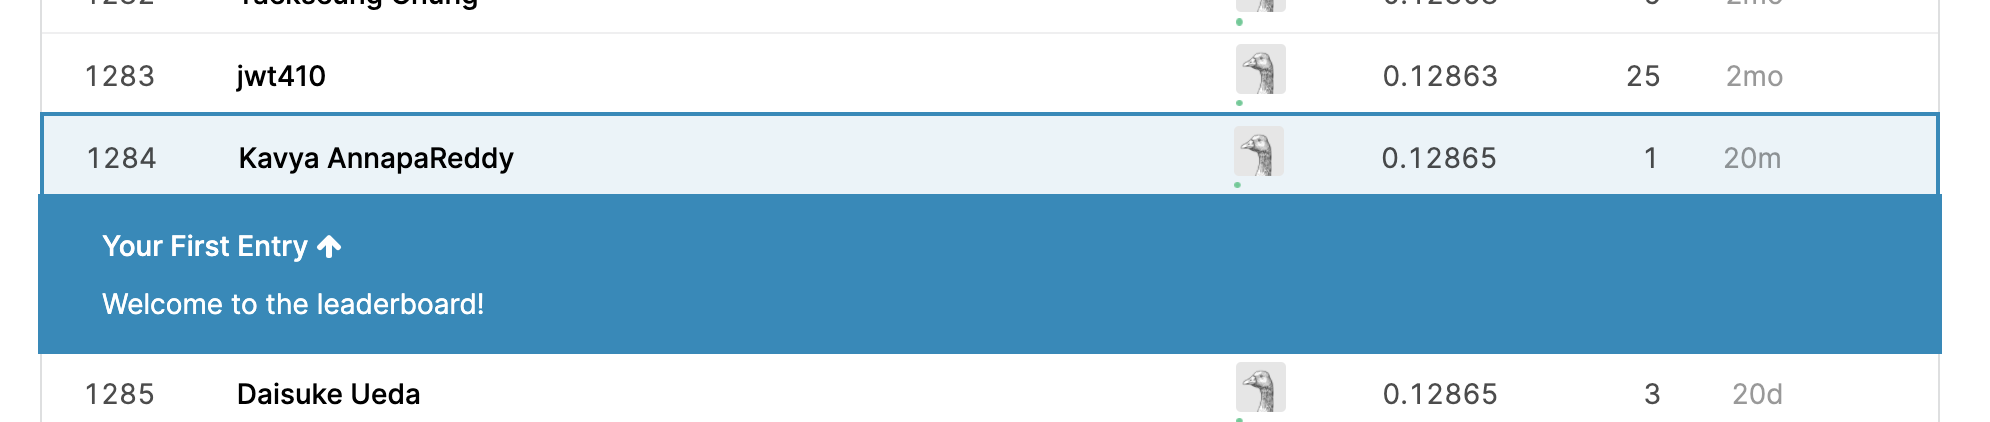